# <p style="text-align: center;"> Final Project - Introduction to Data Science</p>
# <p style="text-align: center;"> <b> Data Pre-processing </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
|Tran Dinh Quang    | 21127406 |
|Nguyen Hong Hanh   | 21127503 |
|Do Quoc Tri  | 21127556 |
| Nguyen Khanh Nhan | 21127657         |


## Table of contents
- [0. Import libraries and load raw data](#0-import-libraries-and-load-raw-data)
- [1. Data cleaning](#1-data-cleaning)
    - [1.1 Handle irrational input values](#11-handle-irrational-input-values)
    - [1.2 Handle text and categorical data](#12-handle-text-and-categorical-data)
    - [1.3 Remove meaningless columns](#13-remove-meaningless-columns)
    - [1.4 Imputation](#14-imputation)
- [2. Detect outliers and normalized data](#2-detect-outlier-and-normalize-data)
- [3. Check multicollinearity](#3-check-multicollinearity)
---

## 0. Import libraries and load raw data

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [51]:
FILE_PATH = '../data/raw.csv'
df = pd.read_csv(FILE_PATH)

df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,severerisk
0,2009-09-27,1253984400,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,...,1254004923,17:46:17,1254048377,0.27,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
1,2009-09-28,1254070800,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,...,1254091320,17:45:39,1254134739,0.30,Overcast,Cloudy skies throughout the day.,cloudy,['48900099999'],obs,NaN
2,2009-09-29,1254157200,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,...,1254177718,17:45:01,1254221101,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
3,2009-09-30,1254243600,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,...,1254264116,17:44:24,1254307464,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
4,2009-10-01,1254330000,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,...,1254350514,17:43:46,1254393826,0.40,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN


## 1. Data cleaning

### 1.1 Handle Irrational Input Values

- Based on the `data exploration` phase. We realize that the `precipprob` and `preciptype` columns are related: if the `precipprob` column has a value of `0`, the `preciptype` column will have `an empty value`, and if the `precipprob` column has a value of `100`, the `preciptype` column will have the value `['rain']`. However, there are some rows that do not follow this rule, and we need to identify them. If there are only a few of these rows, we can delete them, but if there are many, we will need to handle them accordingly.

In [52]:
df[(df['preciptype'] == "['rain']") & (df['precipprob'] == 0)]

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,severerisk
4823,2022-12-11,1670691600,90.5,75.1,81.7,97.3,75.1,85.2,74.2,79.9,...,1670713269,17:31:29,1670754689,0.60,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['48894099999', '48900099999', 'VVTS']",obs,10.0
4824,2022-12-12,1670778000,89.6,74.1,81.1,92.8,74.1,83.0,71.6,75.1,...,1670799701,17:31:53,1670841113,0.63,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['48894099999', '48900099999', 'VVTS']",obs,10.0
4835,2022-12-23,1671728400,88.9,70.5,79.0,87.4,70.5,78.9,64.0,63.2,...,1671750442,17:36:56,1671791816,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['48894099999', '48900099999', 'VVTS']",obs,10.0
4889,2023-02-15,1676394000,93.2,77.0,83.5,97.0,77.0,86.4,71.1,68.2,...,1676416431,18:01:03,1676458863,0.82,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['48894099999', '48900099999', 'VVTS']",obs,10.0
4967,2023-05-04,1683133200,96.5,84.1,88.7,107.4,95.7,100.8,77.0,70.2,...,1683153251,18:06:06,1683198366,0.45,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['48894099999', '48900099999', 'VVTS']",obs,10.0


- There are only 5 rows that do not follow the rule above, so we can drop them.

In [53]:
dropped_rows = df[(df['preciptype'] == "['rain']") & (df['precipprob'] == 0)].index
df = df.drop(dropped_rows)

- Check the number of rows in the dataset to make sure that we have dropped the correct rows.

In [54]:
df.shape

(4995, 36)

### 1.2 Handle text and categorical data

- The purpose of the problem is to rely on environmental data to predict the weather at that specific time. Because weather patterns vary in cycles throughout the seasons. Therefore, we will use a column for `month` for analysis instead of storing a specific date.
- As mentioned above, the `preciptype` column is related to the `precipprob` column. Therefore, we will encode the `preciptype` column by converting the `rain` value to `1` and the `empty value` to `0`.

In [55]:
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['preciptype'] = [1 if i == "['rain']" else 0 for i in df['preciptype']]

### 1.3 Remove meaningless columns

**Numeric data:** <br>
Based on the `data exploration` phase, we will have the following decisions:
*   `datetime`, `dateEpoch`: the purpose of the problem is to rely on environmental data to predict the weather at that specific time. Because weather patterns vary in cycles throughout the seasons. Therefore, we will use a column for `month` for analysis instead of storing a specific date.
*   `preciptype`, `precipprob`: we can see that the `precipprob` column only has two values, which are `0` and `100%`, corresponding to the values of `rain` and `an empty value` in the `preciptype` column. Therefore, we can eliminate one of the two columns, and in this case, we will remove `precipprob`.
*   `sunrise`, `sunset`, `sunriseEpoch`, `sunsetEpoch`: for the sunrise and sunset times, we will store as the `number of seconds since 00:00 so` that it will be **convenient** when analyze the relationships between these two columns and the remaining columns in the dataframe.
*   `snow`, `snowdepth`: as the data is obtained from `Ho Chi Minh City, Vietnam`, a city where **snowfall never occurs,** we will **remove** columns related to snow with a high number of missing values.
*   `windgust`, `severerisk`: will be removed due to a high percentage of missing values (90%) and lack of meaningful relevance to the posed problem.

In [56]:
df['sunrise'] = pd.to_datetime(df['sunrise'], format='%H:%M:%S')

df['sunrise'] = df['sunrise'].dt.hour * 3600 + df['sunrise'].dt.minute * 60 + df['sunrise'].dt.second

df['sunset'] = pd.to_datetime(df['sunset'], format='%H:%M:%S')

df['sunset'] = df['sunset'].dt.hour * 3600 + df['sunset'].dt.minute * 60 + df['sunset'].dt.second

drop_columns = ['datetime', 'datetimeEpoch', 'precipprob', 'windgust', 'sunriseEpoch', 'sunsetEpoch', 'snow', 'snowdepth', 'severerisk']

df = df.drop(columns=drop_columns, axis=1)

df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,...,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations,source,month
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,NaN,0.0,...,NaN,20523,63977,0.27,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,9
1,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,NaN,0.0,...,NaN,20520,63939,0.30,Overcast,Cloudy skies throughout the day.,cloudy,['48900099999'],obs,9
2,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,NaN,0.0,...,NaN,20518,63901,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,9
3,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,NaN,0.0,...,NaN,20516,63864,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,9
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,NaN,0.0,...,NaN,20514,63826,0.40,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,10


**Categorical data** <br> 
Based on the `data exploration` phase, we will have the following decisions:
*   `description`, `conditons` and `icon`: We can observe that these columns have equivalent values. Therefore, we will keep only one column, which is `icon`, and remove the other two columns because the value of the `icon` column is **more symbolic**, while `description` and `conditions` provide **more descriptive and detailed** information (which is unnecessary).
*   `stations`: will be removed as its values are complex and not helpful for our machine learning models.
*   `source`: it has only one unique value so we will remove it.

In [57]:
drop_columns = ['description', 'conditions', 'stations', 'source']

df = df.drop(columns=drop_columns, axis=1)

df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,icon,month
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,NaN,0.0,...,87.9,5.6,NaN,NaN,NaN,20523,63977,0.27,partly-cloudy-day,9
1,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,NaN,0.0,...,90.4,6.6,NaN,NaN,NaN,20520,63939,0.30,cloudy,9
2,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,NaN,0.0,...,82.1,6.6,NaN,NaN,NaN,20518,63901,0.34,partly-cloudy-day,9
3,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,NaN,0.0,...,90.0,5.7,NaN,NaN,NaN,20516,63864,0.37,partly-cloudy-day,9
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,NaN,0.0,...,70.8,6.6,NaN,NaN,NaN,20514,63826,0.40,partly-cloudy-day,10


### 1.4 Imputation

- First, we will look around the data to see if there are any missing values. If there are, we will use the appropriate method to fill in the missing values.

In [58]:
missing_values_per_column = df.isnull().sum()
missing_values_per_column.to_frame()

,0
tempmax,0
tempmin,0
temp,0
feelslikemax,0
feelslikemin,0
feelslike,0
dew,0
humidity,0
precip,96
precipcover,0


- There are total `5` columns that have missing values, which are `precip`, `pressure`, `solarradiation`, `solarenergy` and `uvindex`. We will use `KNN imputer` to impute missing values.

- `K-nearest neighbor imputation` is a common hot deck method replacing the `missing data` with the values from some similar complete data points. `K nearest neighbors` are found by minimizing a distance function, such as heterogeneous euclidean overlap metric. For `continuous data`, a replacement value to substitute the missing attribute value can be estimated by using mean or weighted average, the contribution of each neighbor is weighted by similarity of its expression to that of the data point needed to fill in. For `categorical data`, the mode can be used.

In [59]:
k_neighbors = 3

df_imputed = df.drop(columns=['icon']).copy()

knn_imputer = KNNImputer(n_neighbors=k_neighbors)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_imputed), columns=df_imputed.columns)

df_imputed['icon'] = df.reset_index(drop=False)['icon']

df_imputed

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,month,icon
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,1.550667,0.00,...,87.9,5.6,150.800000,13.166667,5.333333,20523.0,63977.0,0.27,9.0,partly-cloudy-day
1,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,1.097000,0.00,...,90.4,6.6,205.633333,17.833333,7.333333,20520.0,63939.0,0.30,9.0,cloudy
2,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,0.053667,0.00,...,82.1,6.6,182.466667,15.700000,6.333333,20518.0,63901.0,0.34,9.0,partly-cloudy-day
3,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,0.577333,0.00,...,90.0,5.7,248.766667,21.500000,9.000000,20516.0,63864.0,0.37,9.0,partly-cloudy-day
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,0.634000,0.00,...,70.8,6.6,159.666667,13.700000,5.666667,20514.0,63826.0,0.40,10.0,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,93.2,80.5,86.3,117.1,88.8,101.9,81.0,85.2,0.008000,4.17,...,49.7,6.4,218.500000,18.800000,9.000000,19783.0,65542.0,0.40,6.0,rain
4991,93.2,82.2,86.5,113.5,93.5,102.6,80.8,83.8,0.004000,4.17,...,57.9,6.5,191.500000,16.600000,8.000000,19785.0,65559.0,0.44,6.0,rain
4992,95.0,82.2,87.2,115.1,93.6,103.6,81.0,83.0,0.004000,4.17,...,63.9,6.2,180.500000,15.700000,9.000000,19787.0,65575.0,0.47,6.0,rain
4993,95.0,75.2,85.5,116.0,75.2,98.0,79.7,84.2,0.433000,4.17,...,68.3,6.1,195.800000,16.700000,9.000000,19790.0,65592.0,0.50,6.0,rain


- Check the number of missing values in the dataset to make sure that we have imputed the correct values.

In [60]:
missing_values_per_column = df_imputed.isnull().sum()

missing_values_per_column.to_frame()

,0
tempmax,0
tempmin,0
temp,0
feelslikemax,0
feelslikemin,0
feelslike,0
dew,0
humidity,0
precip,0
precipcover,0


- To check if imputation has a negative impact on the columns, we will examine the distribution of the columns after imputation and compare it to the distribution before imputation using a `KDE plot`.
- A `KDE plot` is commonly used to gain a better understanding of the distribution of a random variable, examine symmetry, concentration, and tails of the data, and compare distributions between different groups.
- However, for the `pressure` column, which has only one missing value, we will not examine its distribution.

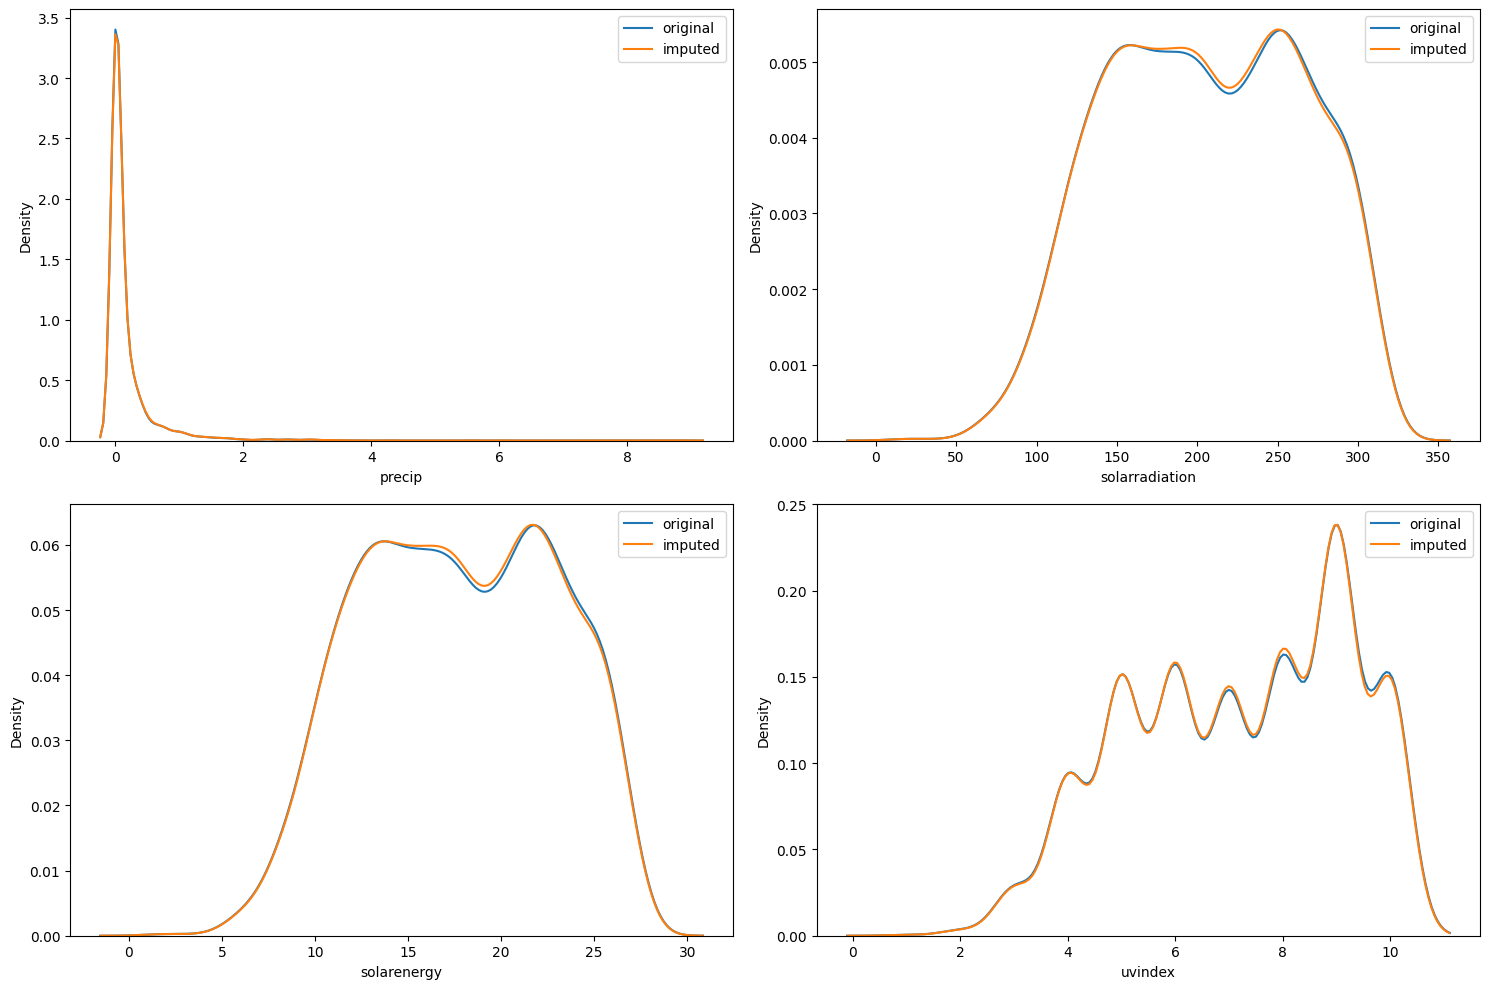

In [61]:
cols = ['precip', 'solarradiation', 'solarenergy', 'uvindex']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for col, i, j in zip(cols, [0, 0, 1, 1], [0, 1, 0, 1]):
    sns.kdeplot(df[col], ax=axes[i, j], label='original')
    sns.kdeplot(df_imputed[col], ax=axes[i, j], label='imputed')
    axes[i, j].legend()
    
plt.tight_layout()
plt.show()    

**Comment:**
- We can see that the `distribution` of the columns `after imputation` is **not significantly different** from the distribution `before imputation`. Therefore, we can conclude that imputation **does not have a negative impact** on the columns.

## 2. Detect outlier and Normalize data

- Based on the `exploration phase`, we will only focus on some columns to detect their outliers and make their distribution more normalized.

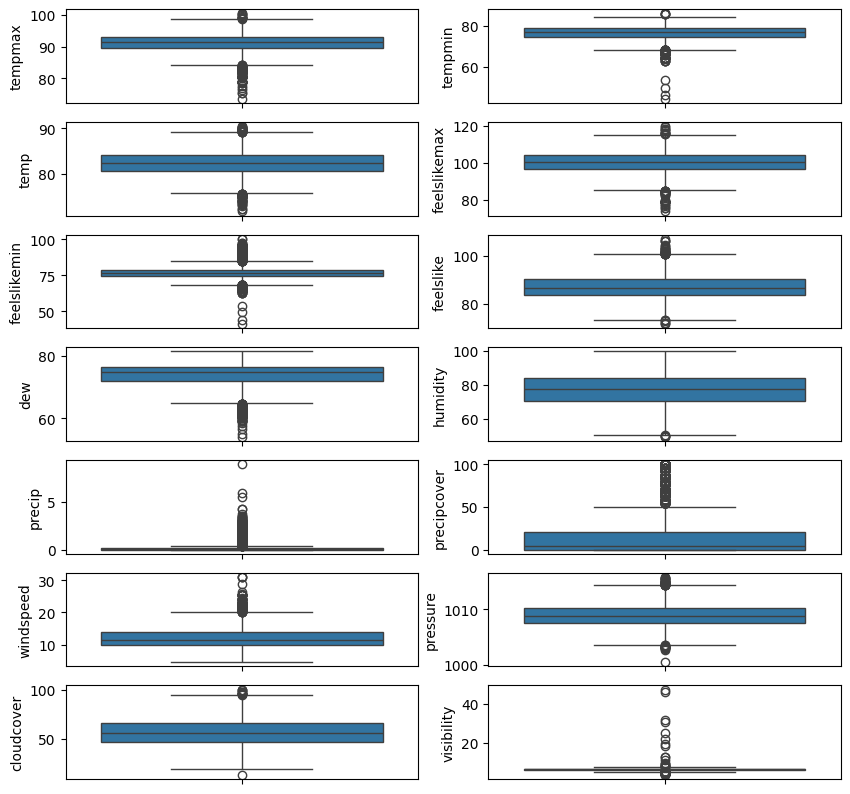

In [62]:
boxplot_cols = df_imputed.drop(columns=['icon', 'month', 'moonphase', 'sunset', 'sunrise',
                                        'uvindex', 'solarradiation', 'solarenergy', 'winddir', 'preciptype'])
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 10))
for i, col in enumerate(boxplot_cols.columns):
    sns.boxplot(df_imputed[col], ax=axes[i//2, i%2])

In [63]:
from summarytools import dfSummary
dfSummary(boxplot_cols)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,tempmax[float64],Mean (sd) : 91.0 (3.3)min < med < max:73.6 < 91.4 < 100.5IQR (CV) : 3.6 (27.7),182 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/SrBM8AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADDklEQVR4nO3au27iQBSA4TMxF3ORLcLKdDRbRkpB6X7bPGweIZEotqbdii6KZdmKg2VjvMVetCvtJvEtcMj/1Yxnil/D4MGUZSnAqbs49gKAt+gdewH4mzFmJCKDBo/IyrLctbWeU0GoJ8QYM5rP5zeO48zqPiOO49AYc3tusRJqBxrsis50OvV8349d102rDo6iyL6/v/eCIPhkjIlrzH+yuzGhtqzJrpjnuV0UxdVwOLzzPO+56vgkSfp5nl8vl0vLsqzKoZ/ybkyo7Rs4jjPzfX9XdVfcbrezzWYz3u/3Vp2Jsyzr2bY9Xq1W6WKxCKuMjaLIXq/XsyAIBiJCqB+F67pp1V0xDMNRG3NPJpPKc//Uyvxd4PUUVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFXrHXgBOR1EUfRFxjDF1H5GVZblrcUm/ESpERCRJkn6e59fL5dKyLCut84w4jkNjzG0XsRLqfxhjRiIyqDHUORwO/bbX07Usy3q2bY9Xq1W6WCzCquOjKLLX6/UsCIKBiBDqezDGjObz+Y3jOLOqY/M8t4uiuErT9E5EnjtYXqcmk0nqeV7ddY9aXcwfCPXfBo7jzHzf37muW+lrcLvdzjabzXi/31tdLe4jItQXuK5beXcJw7CzXeUjO9tQG5wxRZSeM8/ZWYba5Iwpov+ceY7OMlRpcMYU4Zx5is41VBGpd8YU4Zx5is46VLyvhjdbL95qESpa0fRm67VbLUJFK5rcbL3lVqvTUBu+IhL58e+uQ41xvF46kgY3Wy/+Lng1VGOMLSLDGhPbl5eXX1zXndYYK0VR9JMk+TydTr9dXFzkVcb+er30+Pj4tc7cT09PtohIkiT2w8PDWMNYzXNHUWS/9pnvneQ6mAT1xrAAAAAASUVORK5CYII="">",0(0.0%)
2,tempmin[float64],Mean (sd) : 76.1 (3.2)min < med < max:44.5 < 76.9 < 85.9IQR (CV) : 4.2 (23.7),143 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/SrBM8AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACU0lEQVR4nO3dPY7aUBiF4e+GgbEB2UIo0LGBSBSULCKLzRJSsAJaKjoLhIxwxsEYp0qkNMPgn8EHvU/NHW7xNh6JY1cUhQFt9+XRFwA+4uXRF0C9nHO+mfVKHj8XRfFW533qQqhPxDnnj8fj70EQjMqcPx6PB+fcjzbGSqjPpRcEwWi5XL6FYZjeczCOY2+1Wo32+33PzAgVzQvDMJ1MJr9KHPVrv0xNeJiCBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBLan8E+e510zC5xzZf9EY7OVhAozM0uSpJtl2Xw2m3U6nc5dS4B/NTlbSagwM7Pz+fzieV5/sVik0+n0cO/5pmcrCRX/GQwGZScrzRqcreRhChIIFRIIFRIIFRIIFRJ46m+Ziu+JCq7Xa7fO+7QFobZI1fdEZVnm5Xn+LU3Tn2ZW9l9MrUSo7VL6PVFmZtvtdrRer/uXy6XTxOUeiVBbqOx7og6HQ2vfE1UVD1OQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQwE9RUJuKs5XvTlYSKmpRdbby1mQloaIWVWYrPzJZSagNqDAiIT8gUWG28t1f0BJqzaqMSDzzgERVN0N1znlm9voJd3kWwXA4/Dqfzy++7/++5+But/M2m00/juNBFEXne7/4dDp5ZmZJknhRFPU/62zV83Ece7c+8wcOkMujgdYLhwAAAABJRU5ErkJggg=="">",0(0.0%)
3,temp[float64],Mean (sd) : 82.4 (2.7)min < med < max:71.7 < 82.4 < 90.5IQR (CV) : 3.4 (31.0),170 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/SrBM8AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtElEQVR4nO3dMW/aQBiH8f+VQAyJ7ECksLEyVOrAyN61H7YfoUOGjhHfIFuUBCXCxYUAnVKRKk1qHy73Hs9vv+DhUcTZvGe32WwEhO7Dvi8A+BdH+76AGDnn2pJaFZcvNpvNfJfXEwNC3THnXPv8/PxLmqbdKusfHx+nzrmvxPoSoe5eK03T7ng8nmdZVpRZ+PDwkFxeXnbv7u5akgh1C6HWJMuy4uLi4keFpe2dX0wE2EzBBEKFCYQKEwgVJhAqTGDXH5jVatWUlDrnqv6JKB8YEGpA8jxvLpfLT4PBoNFoNErdg30W6wMDQg3IYrE4SpKkMxqNin6/Py27PuYHBoQaoJOTk6oPC6RIHxiwmYIJhAoTCBUmECpMIFSYQKgwgVBhAqHCBEKFCYQKE3iE+hceI8/per1u7vp6Dh2hvsJn5Hm5XCar1epjURTfJFV9Xo8/EOrrKo88X19fdyeTSefp6alR18UdIkJ9Q5WR5+l0GuWvl/aNzRRMIFSYQKgwgVBhAqHCBEKFCYQKEwgVJhAqTCBUmECoMIFQYQI/SomM52mAwZ4ESKgR8T0NMOSTAAk1Ij6nAYZ+EiChRsjjNMBgf0vLZgomECpMIFSYEO13VM83PDPyHJgoQ/V9wzMjz+GJMlR5jDtLjDyHKNZQJVV/wzMjz+FhMwUTCBUmECpMIFSYQKgwgVBhAqHChKjvo6Icz+kAqcYJAUKFJP/pAKneCQFChSS/6QCp/gkBQsULHtMBUo0TAmymYELQ/1F5hQ6eBRsqr9DBtmBDFa/QwZaQQ5XEK3QsqfOUllpDZW7pcNR9Ssu7oTrnEknHZT9YUtLr9T5nWXZaYe3v75m3t7ffy66dzWaJJOV5ntzc3HT+5/p9rd33Z9/f358mSdIZDofu7OzsZ5m18/n8+Orq6s17sL8ApVtfbtUmGVYAAAAASUVORK5CYII="">",0(0.0%)
4,feelslikemax[float64],Mean (sd) : 99.9 (5.7)min < med < max:73.6 < 100.3 < 119.7IQR (

- Based on the `boxplot` and `histogram` charts, we will have two steps:
    - First, we will remove the `extremely outliers` using the `IQR` method.
    - Then, we will apply `scaling method` to make their distribution closer to a normal distribution.

In [64]:
outlier_columns = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 
           'humidity', 'windspeed', 'pressure', 'cloudcover']

---
- We will use `IQR` method to remove the `extremely outliers`.

In [65]:
q1 = []
q3 = []

outlier_df = df_imputed[outlier_columns].copy()
for feature in outlier_df.columns:
    q1.append(outlier_df[feature].quantile(0.25))
    q3.append(outlier_df[feature].quantile(0.75))
    
IQR = np.subtract(q3, q1)
lower_bound = np.subtract(q1, 1.5 * IQR)
upper_bound = np.add(q3, 1.5 * IQR)

extreme_outliers = []
for i in range(len(df_imputed)):
    for j, feature in enumerate(df_imputed[outlier_columns].columns):
        if df_imputed[feature][i] < lower_bound[j] or df_imputed[feature][i] > upper_bound[j]:
            extreme_outliers.append(i)
outlier_df = outlier_df.drop(extreme_outliers)
print(f"Number of extreme outliers: {len(set(extreme_outliers))}")
print("Our dataset after removing extreme outliers:")
outlier_df

Number of extreme outliers: 984
Our dataset after removing extreme outliers:


,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,pressure,cloudcover
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,18.3,1005.5,87.9
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,12.8,1006.0,70.8
5,89.9,75.3,82.6,100.9,75.3,88.6,76.7,84.0,12.8,1008.0,56.7
6,85.7,75.3,80.5,98.1,75.3,84.7,78.2,93.1,12.8,1008.4,76.3
7,89.7,73.5,79.8,100.5,73.5,85.2,76.4,90.1,10.3,1009.0,74.2
...,...,...,...,...,...,...,...,...,...,...,...
4980,95.0,77.0,83.7,112.8,77.0,93.6,79.1,87.3,16.1,1010.1,66.5
4984,91.0,78.8,83.1,109.8,78.8,94.3,79.5,89.3,12.8,1009.4,67.0
4985,89.6,73.6,79.5,108.1,73.6,82.5,77.6,94.3,11.6,1007.9,74.3
4986,89.6,77.0,81.6,108.1,77.0,88.9,78.5,91.0,15.0,1006.8,79.4


- Observing the `std` values before and after removing `extremely outliers`.

In [66]:
df_imputed[outlier_columns].describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,pressure,cloudcover
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,91.040521,76.145626,82.353674,99.922883,76.941341,87.188268,73.728969,77.211852,12.068669,1008.960080,56.495135
std,3.281696,3.214971,2.658683,5.707664,4.939295,5.229495,3.836785,9.360433,3.318453,2.043677,14.139013
min,73.600000,44.500000,71.700000,73.600000,41.200000,71.700000,54.100000,49.500000,4.500000,1000.500000,12.900000
25%,89.600000,74.450000,80.700000,96.400000,74.450000,83.600000,71.800000,70.800000,9.800000,1007.600000,46.700000
50%,91.400000,76.900000,82.400000,100.300000,76.900000,86.800000,74.800000,77.900000,11.400000,1008.800000,55.400000
75%,93.200000,78.700000,84.100000,103.900000,78.700000,90.400000,76.500000,84.300000,13.900000,1010.300000,65.900000
max,100.500000,85.900000,90.500000,119.700000,100.300000,106.900000,81.400000,99.800000,31.100000,1015.800000,100.000000


In [67]:
outlier_df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,pressure,cloudcover
count,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000
mean,90.926926,75.840788,82.137497,99.867240,75.860060,86.614161,73.852256,77.988955,11.811094,1008.986637,56.640439
std,2.706172,2.294779,2.078582,4.708548,2.348889,3.945142,3.290311,8.736932,2.967479,1.898540,13.799472
min,84.200000,68.100000,76.000000,85.900000,68.100000,76.500000,64.800000,52.400000,4.500000,1003.600000,19.400000
25%,89.600000,74.800000,80.700000,96.500000,74.800000,83.800000,71.800000,72.200000,9.600000,1007.600000,47.000000
50%,91.400000,75.900000,82.200000,100.100000,75.900000,86.500000,74.700000,78.800000,11.400000,1008.900000,55.800000
75%,93.200000,77.000000,83.600000,102.850000,77.000000,89.300000,76.300000,84.600000,13.900000,1010.300000,66.400000
max,98.600000,80.600000,88.100000,115.100000,84.800000,100.400000,80.300000,98.200000,20.000000,1014.200000,94.700000


**Comment:** <br>
- We can see that after removing `extremely outliers`, the `std` values of these columns are significantly reduced. This means that the data is more concentrated around the mean, and the distribution of the data is more normalized.

Finally, we create a new dataframe to store the processed data.

In [68]:

new_df = df_imputed.drop(outlier_columns, axis=1).drop(extreme_outliers, axis=0)
new_df = pd.concat([outlier_df, new_df], axis=1)
new_df

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,pressure,...,winddir,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,month,icon
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,18.3,1005.5,...,263.1,5.6,150.800000,13.166667,5.333333,20523.0,63977.0,0.27,9.0,partly-cloudy-day
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,12.8,1006.0,...,234.3,6.6,159.666667,13.700000,5.666667,20514.0,63826.0,0.40,10.0,partly-cloudy-day
5,89.9,75.3,82.6,100.9,75.3,88.6,76.7,84.0,12.8,1008.0,...,251.1,6.6,124.000000,10.700000,4.666667,20512.0,63789.0,0.43,10.0,partly-cloudy-day
6,85.7,75.3,80.5,98.1,75.3,84.7,78.2,93.1,12.8,1008.4,...,240.8,6.4,172.400000,14.866667,6.333333,20511.0,63753.0,0.47,10.0,partly-cloudy-day
7,89.7,73.5,79.8,100.5,73.5,85.2,76.4,90.1,10.3,1009.0,...,165.6,5.5,155.733333,13.400000,5.333333,20510.0,63716.0,0.50,10.0,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,95.0,77.0,83.7,112.8,77.0,93.6,79.1,87.3,16.1,1010.1,...,215.4,5.8,190.400000,16.500000,9.000000,19807.0,65384.0,0.08,5.0,rain
4984,91.0,78.8,83.1,109.8,78.8,94.3,79.5,89.3,12.8,1009.4,...,226.5,6.0,182.300000,15.600000,8.000000,19788.0,65445.0,0.21,5.0,rain
4985,89.6,73.6,79.5,108.1,73.6,82.5,77.6,94.3,11.6,1007.9,...,252.1,5.2,199.600000,17.200000,10.000000,19785.0,65461.0,0.25,5.0,rain
4986,89.6,77.0,81.6,108.1,77.0,88.9,78.5,91.0,15.0,1006.8,...,246.5,5.6,86.700000,7.500000,4.000000,19783.0,65477.0,0.28,5.0,rain


---
- After removing `extremely outliers`, we will scale our columns to make their distribution more normalized

In [69]:
scaler = StandardScaler()
cols_to_scale = new_df.columns[:-1]
new_df[cols_to_scale] = scaler.fit_transform(new_df[cols_to_scale])
new_df

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,pressure,...,winddir,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,month,icon
0,-1.118666,-1.020176,-1.557745,0.219365,-1.004881,-1.042972,0.804810,1.718328,2.186945,-1.836712,...,1.077456,-0.337296,-0.902796,-0.874164,-0.913358,-0.562840,-0.534073,-0.736171,0.633058,partly-cloudy-day
4,-0.453437,-0.235689,-0.595430,0.134402,-0.238466,-0.307799,0.744017,1.054397,0.333289,-1.573319,...,0.718558,0.448494,-0.750344,-0.768110,-0.744503,-0.573163,-0.679502,-0.287499,0.915128,partly-cloudy-day
5,-0.379523,-0.235689,0.222537,0.219365,-0.238466,0.503426,0.865602,0.688090,0.333289,-0.519747,...,0.927915,0.448494,-1.363591,-1.364663,-1.251067,-0.575457,-0.715136,-0.183959,0.915128,partly-cloudy-day
6,-1.931724,-0.235689,-0.787893,-0.375373,-0.238466,-0.485255,1.321542,1.729775,0.333289,-0.309032,...,0.799559,0.291336,-0.531409,-0.536117,-0.406793,-0.576604,-0.749808,-0.045906,0.915128,partly-cloudy-day
7,-0.453437,-1.020176,-1.124703,0.134402,-1.004881,-0.358501,0.774414,1.386362,-0.509282,0.007040,...,-0.137563,-0.415875,-0.817973,-0.827765,-0.913358,-0.577751,-0.785443,0.057634,0.915128,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,1.505293,0.505215,0.751810,2.746998,0.485371,1.770965,1.595107,1.065844,1.445483,0.586504,...,0.483031,-0.180138,-0.221920,-0.211328,0.944047,-1.384061,0.821010,-1.391923,-0.495222,rain
4984,0.027006,1.289702,0.463115,2.109780,1.251786,1.948421,1.716691,1.294786,0.333289,0.217754,...,0.621357,-0.022980,-0.361191,-0.390293,0.437482,-1.405853,0.879759,-0.943251,-0.495222,rain
4985,-0.490394,-0.976594,-1.269050,1.748689,-0.962303,-1.042972,1.139166,1.867140,-0.071145,-0.572425,...,0.940377,-0.651612,-0.063737,-0.072132,1.450612,-1.409294,0.895169,-0.805198,-0.495222,rain
4986,-0.490394,0.505215,-0.258620,1.748689,0.485371,0.579478,1.412731,1.489386,1.074752,-1.151890,...,0.870591,-0.337296,-2.004921,-2.000985,-1.588777,-1.411588,0.910579,-0.701658,-0.495222,rain


## 3. Check multicollinearity

- Observing again the `spearman correlation` between the columns in the dataframe after being processed.

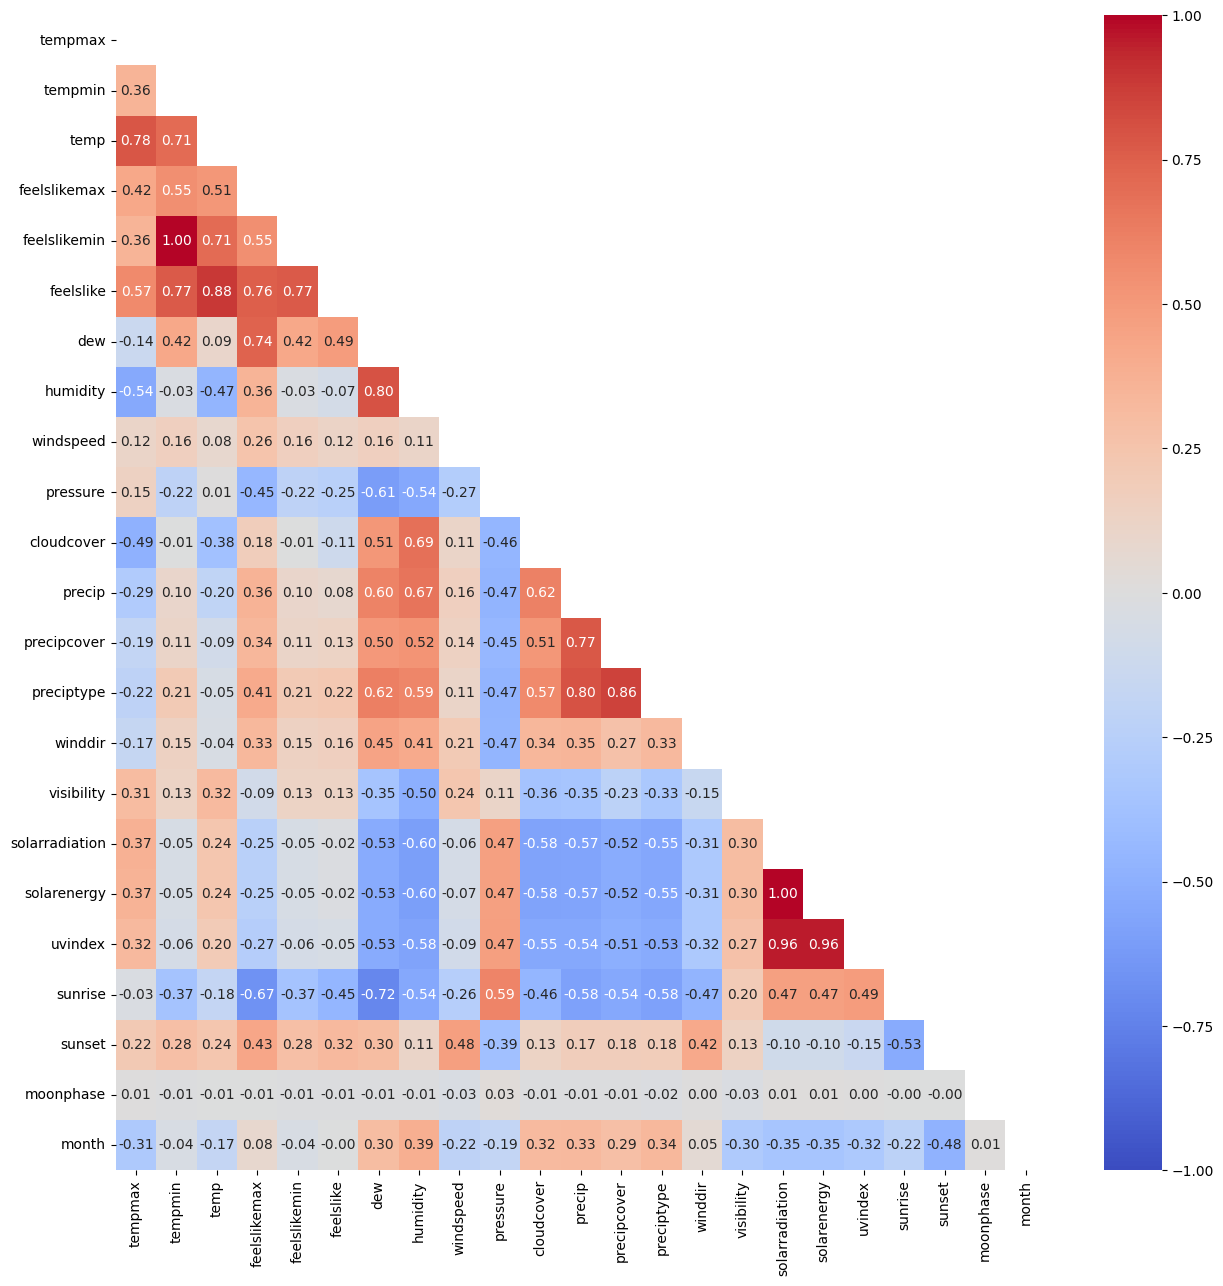

In [70]:
corr_matrix = new_df.drop(columns=['icon']).corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(15, 15))        
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm', mask=mask)
plt.show()

Upon reevaluating the `Spearman correlation` between the columns in the processed dataframe, we can end up with some conclusions: <br>
- The columns `temp`, `tempmax`, `tempmin`, `feelslikemax`, `feelslikemin` and `feelslike` exhibit relatively high correlation with each other as they all represent temperature values. Therefore, we can choose to keep only one representative column. In this case, we will retain the `temp` column as it represents the average actual temperature, which is **more meaningful** than the other columns.
- `humidity` and `dew` also have a relatively high correlation with each other as `humidity` and `dew` are closely related in the context of climate. High humidity increases the likelihood of dew formation. We will keep the `humidity` column because upon observing the distribution of this column, we find that it is closer to a normal distribution compared to the `dew` column.

However, if we only observe the `heatmap`, it can be challenging to assess the correlation between all columns. Therefore, we will use the `Variance Inflation Factor (VIF)` to evaluate the correlation between the columns.
- A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results. Thus, the variance inflation factor can estimate how much the variance of a regression coefficient is inflated due to multicollinearity.
- Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables.
- A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.
$$VIF = \frac{1}{1 - R^2}$$
- With $R^2$ is the coefficient of determination of the regression of the independent variable being calculated on the other independent variables.

In [71]:
target = ['icon']
features = ['temp', 'humidity', 'windspeed', 'pressure', 'cloudcover',
       'precip', 'precipcover', 'preciptype', 'winddir', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'sunrise', 'sunset',
       'moonphase', 'month']
X = new_df[features]
y = new_df[target]

In [72]:
vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X[features].values, i) for i in range(X.shape[1])]

vif_data_scaled.sort_values("VIF", ascending=False)

,Feature,VIF
10,solarradiation,2477.340006
11,solarenergy,2453.600076
12,uvindex,12.665446
13,sunrise,3.912138
1,humidity,3.866148
14,sunset,3.378962
16,month,3.041676
0,temp,2.446150
7,preciptype,2.353095
4,cloudcover,2.325132


- We can see that the `VIF` value of `solarradiation` is very high, which means that this column is highly correlated with other columns. Therefore, we will remove this column.

In [73]:
features.remove('solarradiation')
X = new_df[features]
vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X[features].values, i) for i in range(X.shape[1])]

vif_data_scaled.sort_values("VIF", ascending=False)

,Feature,VIF
10,solarenergy,13.633553
11,uvindex,12.543114
12,sunrise,3.910805
1,humidity,3.863000
13,sunset,3.372221
15,month,3.041462
0,temp,2.445337
7,preciptype,2.352923
4,cloudcover,2.322619
3,pressure,1.983395


- `Solarenergy` has highest `VIF` value, so we will continue to remove this column.
- Removing `solarradiation` and `solarenergy` is also considered **reasonable** because `solarradiation`, `solarenergy` and `uvindex` are all related to solar radiation. However, `uvindex` has a significantly **lower VIF** value compared to `solarradiation` and `solarenergy`, so we will keep the `uvindex` column and remove the other two columns.

In [74]:
features.remove('solarenergy')
X = new_df[features]
vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X[features].values, i) for i in range(X.shape[1])]

vif_data_scaled.sort_values("VIF", ascending=False)

,Feature,VIF
11,sunrise,3.866514
1,humidity,3.853825
12,sunset,3.347349
14,month,3.035989
0,temp,2.443007
4,cloudcover,2.291703
7,preciptype,2.282592
3,pressure,1.977023
10,uvindex,1.755391
8,winddir,1.523650


- After all, all the columns in the dataframe have a `VIF` value of less than `5`, which means that there is no multicollinearity between the columns.
- Finally, we will create a new dataframe to store the processed data into `processed_data.csv` file.

In [75]:
best_df = new_df[features + target]

best_df.to_csv('../data/processed_data.csv', index=False)

best_df.head()

,temp,humidity,windspeed,pressure,cloudcover,precip,precipcover,preciptype,winddir,visibility,uvindex,sunrise,sunset,moonphase,month,icon
0,-1.557745,1.718328,2.186945,-1.836712,2.265555,3.332084,-0.653935,-1.334748,1.077456,-0.337296,-0.913358,-0.562840,-0.534073,-0.736171,0.633058,partly-cloudy-day
4,-0.595430,1.054397,0.333289,-1.573319,1.026222,1.101707,-0.653935,-1.334748,0.718558,0.448494,-0.744503,-0.573163,-0.679502,-0.287499,0.915128,partly-cloudy-day
5,0.222537,0.688090,0.333289,-0.519747,0.004317,2.669459,-0.653935,-1.334748,0.927915,0.448494,-1.251067,-0.575457,-0.715136,-0.183959,0.915128,partly-cloudy-day
6,-0.787893,1.729775,0.333289,-0.309032,1.424838,0.395285,-0.653935,-1.334748,0.799559,0.291336,-0.406793,-0.576604,-0.749808,-0.045906,0.915128,partly-cloudy-day
7,-1.124703,1.386362,-0.509282,0.007040,1.272639,0.629678,-0.653935,-1.334748,-0.137563,-0.415875,-0.913358,-0.577751,-0.785443,0.057634,0.915128,partly-cloudy-day


---
<p style="text-align:center; font-size:30px;">END</p>